In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [2]:
Data = pd.read_csv('Data.csv')

In [3]:
Data.head()

,Y,X1,X2
0,6,7,4
1,7,9,6
2,3,4,6
3,6,7,8
4,5,5,8


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
Y     12 non-null int64
X1    12 non-null int64
X2    12 non-null int64
dtypes: int64(3)
memory usage: 368.0 bytes


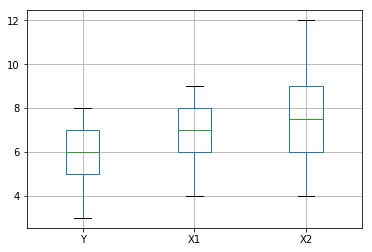

In [5]:
Data.boxplot()

In [6]:
Data.describe()

,Y,X1,X2
count,12.000000,12.000000,12.000000
mean,5.833333,6.833333,7.500000
std,1.337116,1.527525,2.276361
min,3.000000,4.000000,4.000000
25%,5.000000,6.000000,6.000000
50%,6.000000,7.000000,7.500000
75%,7.000000,8.000000,9.000000
max,8.000000,9.000000,12.000000


In [7]:
#Y
Y = np.sum(Data['Y'])

#X1
X1 = np.sum(Data['X1'])

#X2
X2 = np.sum(Data['X2'])

In [8]:
Y

70

In [9]:
X1

82

In [10]:
X2

90

In [12]:
n = np.shape(Data)[0]

In [13]:
n

12

In [14]:
#create new numpy array to store Y,X1, and X2, so you don't have to create loop

data_y = np.array(Data['Y'])
data_x1 = np.array(Data['X1'])
data_x2 = np.array(Data['X2'])

In [15]:
#X1Y
X1Y = data_x1 * data_y
X1Y = np.sum(X1Y)

In [16]:
X1Y

500

In [17]:
#X2Y
X2Y = data_x2 * data_y
X2Y = np.sum(X2Y)

In [18]:
X2Y

526

In [19]:
#X1X2
X1X2 = data_x1 * data_x2
X1X2 = np.sum(X1X2)

In [20]:
X1X2

614

In [24]:
#X1^2
X12 = data_x1 ** 2
X12 = np.sum(X12)

In [25]:
X12

586

In [28]:
#X2^2
X22 = data_x2 ** 2
X22 = np.sum(X22)

In [29]:
X22

732

In [32]:
#A
A = np.matrix([[n,X1,X2],[X1,X12,X1X2],[X2,X1X2,X22]])

In [37]:
#A1
A1 = np.matrix([[Y,X1,X2],[X1Y,X12,X1X2],[X2Y,X1X2,X22]])

In [38]:
#A2
A2 = np.matrix([[n,Y,X2],[X1,X1Y,X1X2],[X2,X2Y,X22]])

In [39]:
#A3
A3 = np.matrix([[n,X1,Y],[X1,X12,X1Y],[X2,X1X2,X2Y]])

In [55]:
b0 = np.linalg.det(A1) / np.linalg.det(A)
b1 = np.linalg.det(A2) / np.linalg.det(A)
b2 = np.linalg.det(A3) / np.linalg.det(A)
print(b0)
print(b1)
print(b2)

-0.18650250797992385
0.8454172366621074
0.032375740994072054


In [61]:
import statsmodels.formula.api as smf

In [68]:
regresi = smf.ols('Y ~ X1+X2', data=Data).fit()

In [69]:
print(regresi.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     62.70
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           5.20e-06
Time:                        17:29:35   Log-Likelihood:                -3.7696
No. Observations:                  12   AIC:                             13.54
Df Residuals:                       9   BIC:                             14.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1865      0.658     -0.283      0.7

C:\Users\windows10\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [71]:
regresi2 = smf.ols('Y ~ X1', data=Data).fit()

In [72]:
print(regresi2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           4.26e-07
Time:                        18:32:09   Log-Likelihood:                -4.0356
No. Observations:                  12   AIC:                             12.07
Df Residuals:                      10   BIC:                             13.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0649      0.512      0.127      0.9

C:\Users\windows10\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [73]:
Data.corr()

,Y,X1,X2
Y,1.000000,0.964366,0.029867
X1,0.964366,1.000000,-0.026144
X2,0.029867,-0.026144,1.000000


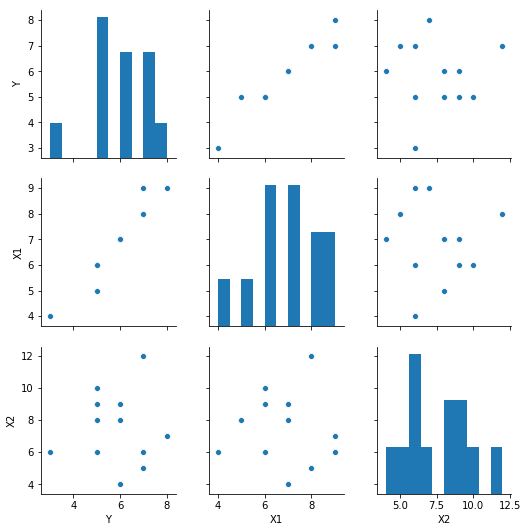

In [75]:
sns.pairplot(Data)

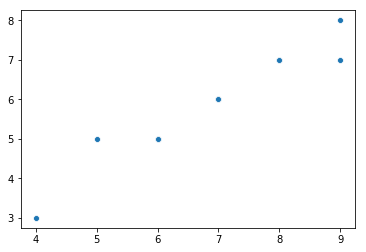

In [91]:
sns.scatterplot(x=data_x1,y=data_y, data=Data)

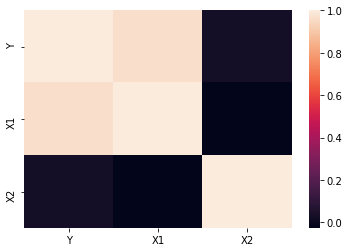

In [92]:
sns.heatmap(Data.corr())

In [93]:
sns.set(style="darkgrid")

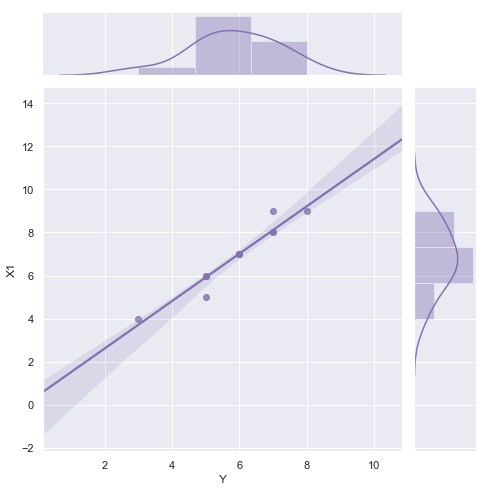

In [98]:
g = sns.jointplot("Y", "X1", data=Data, kind="reg",color="m", height=7)